<a href="https://colab.research.google.com/github/souravkarma/Stock-market-prediction-LSTM/blob/main/Stock_Market_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROCESS

1. COLLECT STOCK DATA
2. PRE-PROCESS THE DATA--TRAIN/TEST
3. CREATE STACKED LSTM MODEL
4. PRACTICE TEST DATA AND PLOT OUTPUT
5. PREDICT FUTURE 30 DAYS DATA

In [38]:
!pip install yfinance


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

In [60]:
data=yf.download(['ZOMATO.NS'],start='2022-01-01',end='2024-01-15',interval='1D')
data.to_csv('ZOMATO.csv')
df=pd.read_csv('ZOMATO.csv').reset_index()
df


[*********************100%%**********************]  1 of 1 completed


,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2022-01-03,139.699997,142.449997,138.300003,141.350006,141.350006,22518241
1,1,2022-01-04,141.350006,141.550003,137.600006,138.350006,138.350006,10705792
2,2,2022-01-05,137.899994,137.899994,133.300003,133.949997,133.949997,15874857
3,3,2022-01-06,133.000000,133.149994,129.600006,130.000000,130.000000,23780419
4,4,2022-01-07,130.000000,131.449997,129.000000,129.250000,129.250000,22846951
...,...,...,...,...,...,...,...,...
498,498,2024-01-08,133.649994,133.649994,130.000000,132.850006,132.850006,38912423
499,499,2024-01-09,133.199997,135.000000,132.600006,134.300003,134.300003,33803263
500,500,2024-01-10,134.250000,136.149994,132.250000,134.649994,134.649994,29917881
501,501,2024-01-11,135.300003,139.000000,135.050003,138.350006,138.350006,41809415


In [61]:
df2=df['Close']
df2.shape

(503,)

# comparison of close price

Text(0, 0.5, 'Price')

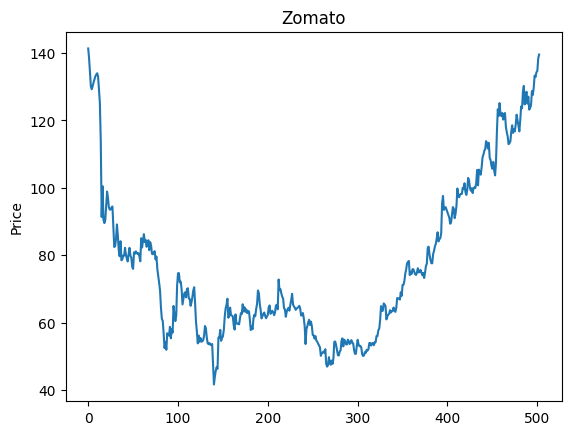

In [101]:
plt.plot(df2)
plt.title('Zomato')
plt.ylabel('Price')

In [63]:
## LSTM ARE SENSATIVE TO SCALE OF DATA , SO WE USE MINMAXSCALER TO TRANSFORM DATA FROM 0 TO 1.(STANDARDIZATION)

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df2).reshape(-1,1))
print(df3)

[[1.        ]
 [0.96990973]
 [0.92577724]
 [0.88615842]
 [0.87863585]
 [0.88816441]
 [0.89919757]
 [0.90872612]
 [0.91725176]
 [0.9222668 ]
 [0.92627878]
 [0.91675022]
 [0.87813432]
 [0.83801396]
 [0.72216647]
 [0.49849543]
 [0.58976923]
 [0.48996987]
 [0.48044132]
 [0.48896688]
 [0.53059177]
 [0.57422264]
 [0.55616845]
 [0.52708117]
 [0.52056168]
 [0.52056168]
 [0.52708117]
 [0.5295887 ]
 [0.47191568]
 [0.40922762]
 [0.41173514]
 [0.43430284]
 [0.47642927]
 [0.44383147]
 [0.4002006 ]
 [0.38164487]
 [0.42627882]
 [0.36960879]
 [0.37261785]
 [0.38415239]
 [0.3831494 ]
 [0.4067201 ]
 [0.38665992]
 [0.37462384]
 [0.36609828]
 [0.38816445]
 [0.4067201 ]
 [0.38365094]
 [0.3776329 ]
 [0.35005015]
 [0.34403203]
 [0.39317949]
 [0.38866598]
 [0.39618855]
 [0.3921765 ]
 [0.38816445]
 [0.39067197]
 [0.38114341]
 [0.36659974]
 [0.43530591]
 [0.40772317]
 [0.42778335]
 [0.44734199]
 [0.42377129]
 [0.43029087]
 [0.40972915]
 [0.41875625]
 [0.4292878 ]
 [0.39969906]
 [0.42377129]
 [0.4137412 ]
 [0.38

In [65]:
df3.shape

(503, 1)

In [66]:
#2ND STEP STARTS

In [67]:
#splitting datasets into train and test
training=int(len(df3)*0.65)
test=len(df3)-training
training,test

(326, 177)

In [68]:
training_d,test_d=df3[:training],df3[training:]
test_d


array([[0.23319959],
       [0.21865595],
       [0.21965894],
       [0.24122361],
       [0.23821463],
       [0.23319959],
       [0.19358073],
       [0.20210629],
       [0.20812436],
       [0.21013035],
       [0.22116347],
       [0.2141424 ],
       [0.21765292],
       [0.21915745],
       [0.22918754],
       [0.21915745],
       [0.21614843],
       [0.228686  ],
       [0.25727182],
       [0.25677028],
       [0.25526576],
       [0.25275823],
       [0.27482448],
       [0.26379132],
       [0.29588765],
       [0.29689064],
       [0.30792373],
       [0.32948843],
       [0.34252758],
       [0.3605817 ],
       [0.36409221],
       [0.36760281],
       [0.32547638],
       [0.33550647],
       [0.3289869 ],
       [0.34302904],
       [0.34302904],
       [0.33550647],
       [0.32798391],
       [0.32597792],
       [0.33299895],
       [0.3460381 ],
       [0.33350049],
       [0.33500501],
       [0.34102305],
       [0.33249749],
       [0.32497493],
       [0.331

In [69]:
#convert an array of values into dataset matrix
def create_datasets(data,time_step=1):
    datax,datay=[],[]
    for i in range(len(data)-time_step-1):
        a=data[i:(i+time_step),0]  ##i=0,0,1,2,3..
        datax.append(a)
        datay.append(data[i+time_step,0])
    return np.array(datax),np.array(datay)


In [70]:
#reshape into X=t,t+1,t+2..
time_step=100
X_train,y_train=create_datasets(training_d,time_step)
X_test,y_test=create_datasets(test_d,time_step)

In [71]:
print(X_train.shape),print(y_train.shape)

(225, 100)
(225,)


(None, None)

In [72]:
print(X_test.shape),print(y_test.shape)

(76, 100)
(76,)


(None, None)

# creating a stack LSTM MODEL

In [73]:
#reshape input to be [samples,time_step,features] which are required to use LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [74]:
print(X_train)

[[[1.        ]
  [0.96990973]
  [0.92577724]
  ...
  [0.18856568]
  [0.20461381]
  [0.29488466]]

 [[0.96990973]
  [0.92577724]
  [0.88615842]
  ...
  [0.20461381]
  [0.29488466]
  [0.33099296]]

 [[0.92577724]
  [0.88615842]
  [0.87863585]
  ...
  [0.29488466]
  [0.33099296]
  [0.33149442]]

 ...

 [[0.22417249]
  [0.22818454]
  [0.21965894]
  ...
  [0.12537612]
  [0.12587762]
  [0.14443327]]

 [[0.22818454]
  [0.21965894]
  [0.2367101 ]
  ...
  [0.12587762]
  [0.14443327]
  [0.14393177]]

 [[0.21965894]
  [0.2367101 ]
  [0.25075225]
  ...
  [0.14443327]
  [0.14393177]
  [0.16148443]]]


In [75]:
#creating the LSTM Model
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [76]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
pip show tensorflow keras

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl
---
Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [79]:
!pip install keras
import keras
callback = keras.callbacks.EarlyStopping(monitor='loss',
                                               patience=3)


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1,callbacks=[callback])

Epoch 1/100
4/4 [==============================] - 19s 929ms/step - loss: 0.0234 - accuracy: 0.0044 - val_loss: 0.1630 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 1s 204ms/step - loss: 0.0053 - accuracy: 0.0044 - val_loss: 0.0776 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 1s 206ms/step - loss: 0.0035 - accuracy: 0.0044 - val_loss: 0.1892 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 1s 210ms/step - loss: 0.0041 - accuracy: 0.0044 - val_loss: 0.2006 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 1s 224ms/step - loss: 0.0034 - accuracy: 0.0044 - val_loss: 0.1413 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 1s 203ms/step - loss: 0.0031 - accuracy: 0.0044 - val_loss: 0.1090 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 1s 204ms/step - loss: 0.0031 - accuracy: 0.0044 - val_loss: 0.1353 - val_accur

In [80]:
#let's do prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 31ms/step


In [81]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [82]:
#calculate RMSE performance metris
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

59.18112075529368

In [83]:
##test datta rmse
math.sqrt(mean_squared_error(y_test,test_predict))

101.81333693388322

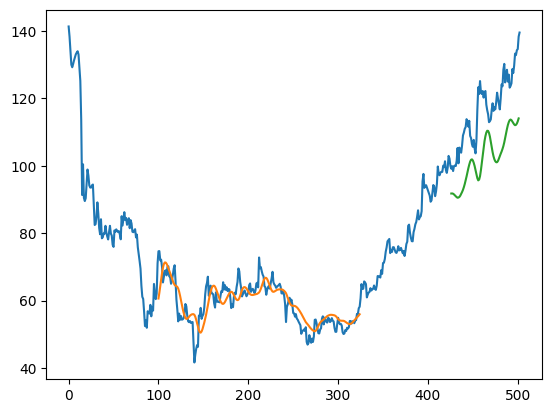

In [84]:
##plotting
look_back=100
trainpredictplot=np.empty_like(df3)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test prediction for plotting
testpredictplot=np.empty_like(df3)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df3)-1,:]=test_predict

#plot
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [85]:
len(test_d)

177

we are taking last 100 values for training to predict next value

In [90]:
x_input=test_d[77:].reshape(1,-1)
x_input.shape

(1, 100)

In [91]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [92]:
temp_input

[0.4784352533414184,
 0.4824473045702367,
 0.5040120129670622,
 0.5280842438164601,
 0.5230691989113152,
 0.49498491683309903,
 0.5085255227722878,
 0.5320962185217664,
 0.5832497377730541,
 0.5611834942763092,
 0.557171443047491,
 0.5656970806050468,
 0.5672015328577806,
 0.5672015328577806,
 0.5857572602256265,
 0.5812436738968887,
 0.598796331064896,
 0.5727181128628449,
 0.5641925518288011,
 0.5797391451206431,
 0.6148444594566573,
 0.6068204335225327,
 0.5852557251257071,
 0.5767301640916633,
 0.5842527314493806,
 0.5697090553103532,
 0.5842527314493806,
 0.5862587188020336,
 0.584754190025788,
 0.6003008598411419,
 0.6384152317296479,
 0.5927782924834246,
 0.6394182254059746,
 0.6298895941720921,
 0.6243730906905398,
 0.6459377990873654,
 0.6755265334183154,
 0.6840520944523591,
 0.6955867130388951,
 0.7006017579440398,
 0.7241724536935183,
 0.7176528800121278,
 0.7021062867202859,
 0.7191574087883734,
 0.6745235397419889,
 0.6680039660605981,
 0.6499497737926716,
 0.641925747858

In [93]:
#demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while (i<30):
    if (len(temp_input))>100:
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.7506493]
101
1 day input [0.4824473  0.50401201 0.52808424 0.5230692  0.49498492 0.50852552
 0.53209622 0.58324974 0.56118349 0.55717144 0.56569708 0.56720153
 0.56720153 0.58575726 0.58124367 0.59879633 0.57271811 0.56419255
 0.57973915 0.61484446 0.60682043 0.58525573 0.57673016 0.58425273
 0.56970906 0.58425273 0.58625872 0.58475419 0.60030086 0.63841523
 0.59277829 0.63941823 0.62988959 0.62437309 0.6459378  0.67552653
 0.68405209 0.69558671 0.70060176 0.72417245 0.71765288 0.70210629
 0.71915741 0.67452354 0.66800397 0.64994977 0.64192575 0.66248739
 0.63640917 0.62236703 0.66098293 0.75075221 0.81895685 0.79889667
 0.8375125  0.80441317 0.79889667 0.80792369 0.78836504 0.80441317
 0.80792369 0.76730187 0.75075221 0.73871613 0.71514536 0.71815442
 0.723671   0.7517552  0.77131392 0.74874622 0.7597793  0.75325973
 0.77482444 0.80290864 0.78535599 0.77031085 0.75325973 0.78585752
 0.82748241 0.82196583 0.87161482 0.88866594 0.83350045 0.85957867
 0.87111328 0.83600797 0.85656969 

In [94]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [95]:
len(df3)

503

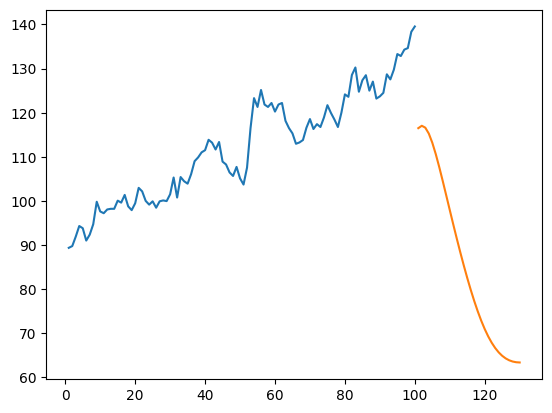

In [96]:
plt.plot(day_new,scaler.inverse_transform(df3[403:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

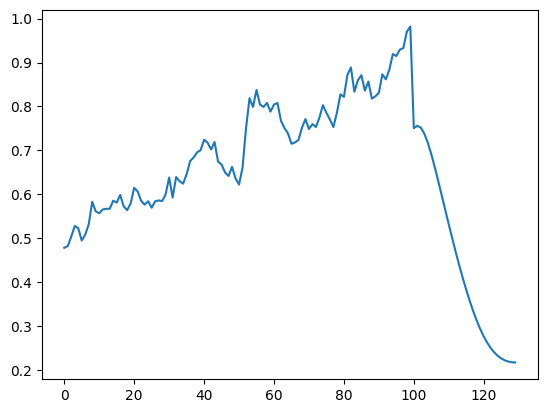

In [97]:
df4=df3.tolist()
df4.extend(lst_output)
plt.plot(df4[403:])

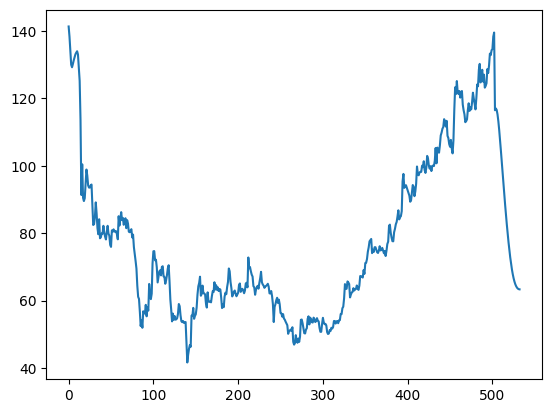

In [98]:
df4=scaler.inverse_transform(df4).tolist()
plt.plot(df4)

[*********************100%%**********************]  1 of 1 completed


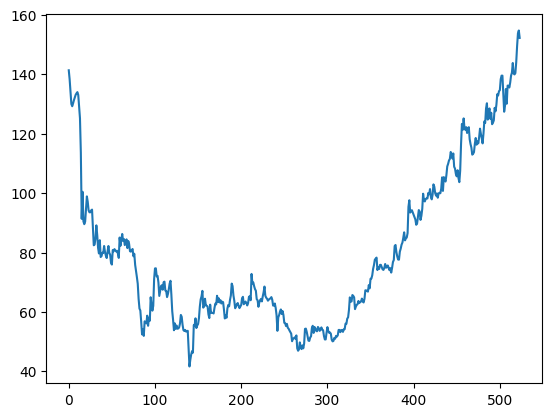

In [103]:
data2=yf.download(['ZOMATO.NS'],start='2022-01-01',end='2024-02-15',interval='1D')
data2.to_csv('ZOMATO.csv')
df2=pd.read_csv('ZOMATO.csv').reset_index()
df2
df2=df2['Close']
plt.plot(df2)